# Breast Cancer Wisconsin (Diagnostic)
![BC](https://images.indianexpress.com/2020/02/cancer-new.jpg)

**Dataset Description**

The Breast Cancer datasets is available UCI machine learning repository maintained by the University of California, Irvine. The dataset contains 569 samples of malignant and benign tumor cells.

The first two columns in the dataset store the unique ID numbers of the samples and the corresponding diagnosis (M=malignant, B=benign), respectively. The columns 3-32 contain 30 real-value features that have been computed from digitized images of the cell nuclei, which can be used to build a model to predict whether a tumor is benign or malignant.

* 1= Malignant (Cancerous) - Present (M)
*  0= Benign (Not Cancerous) -Absent (B)

# Load libraries and read the data

In [12]:
import numpy as np
import pandas as pd

from sklearn import model_selection
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, roc_auc_score
from pandas.plotting import scatter_matrix
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
sns.set_style("dark")
import warnings
warnings.filterwarnings('ignore')

In [15]:
#Import datset
data = pd.read_csv('data/Breast-cancer-data.csv')
data.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

All features are complete, only 'Unnamed: 32' is completely null, probably an error in the dataset, let's drop the unnecessary data

In [19]:
# data = data.drop(['Unnamed: 32','id'], axis = 1 , inplace=True) 

'''
These columns can't be dropped because the dataset don't have the column ['Unnamed: 32']
'''

"\nThese columns can't be dropped because the dataset don't have the column ['Unnamed: 32']\n"

In [20]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [21]:
data.skew()

id                         6.473752
radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  1.645732
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1.473555
concavity_worst            1

The skew result show a positive (right) or negative (left) skew. Values closer to zero show less skew. From the graphs, we can see that **radius_mean, perimeter_mean, area_mean, concavity_mean and concave_points_mean** are useful in predicting cancer type due to the distinct grouping between malignant and benign cancer types in these features. We can also see that area_worst and perimeter_worst are also quite useful.

# Exploratory Data Analysis (EDA)

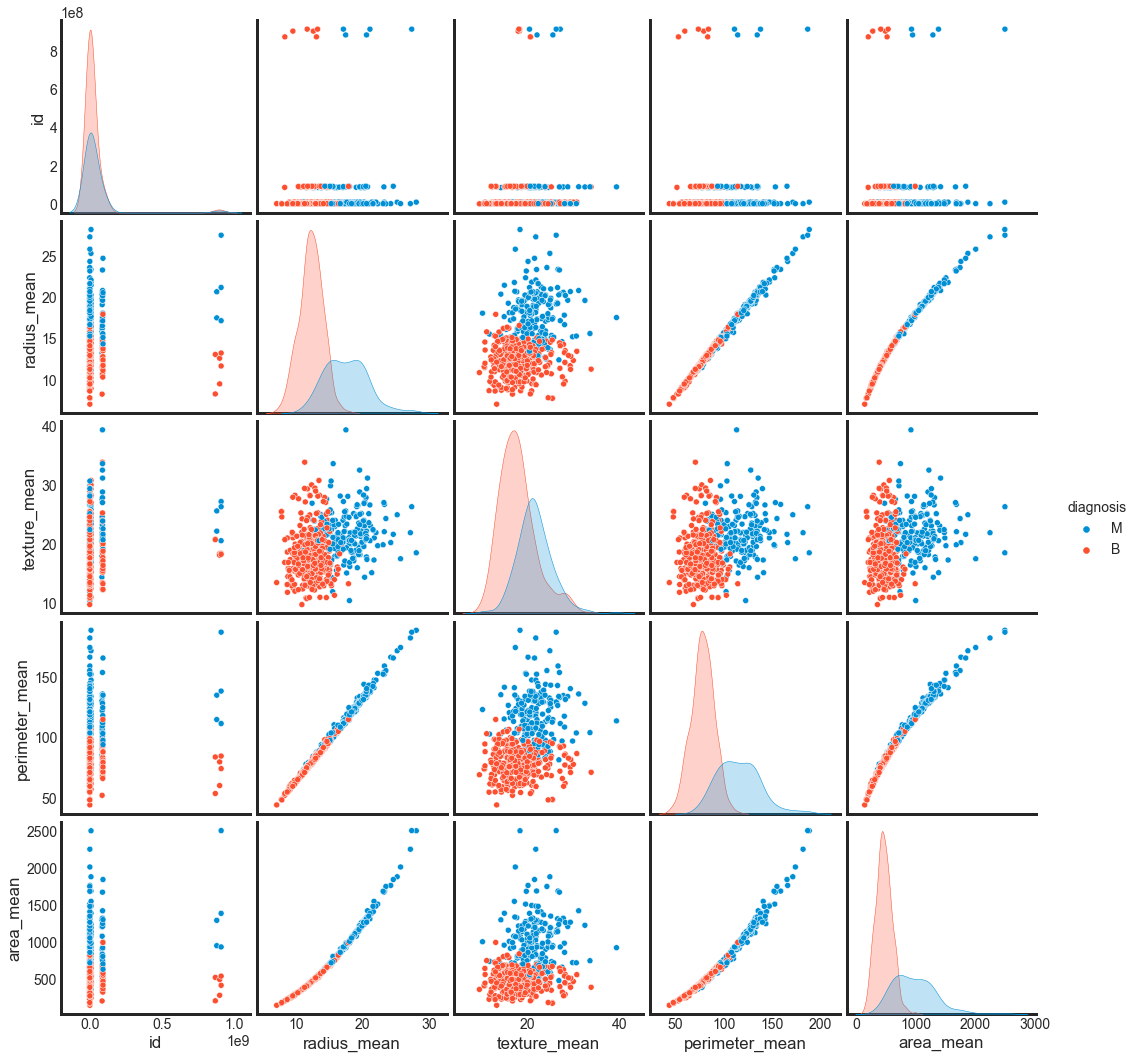

In [22]:
#Visualizing Multidimensional Relationships
plt.style.use('fivethirtyeight')
sns.set_style("white")
sns.pairplot(data[[data.columns[0], data.columns[1],data.columns[2],data.columns[3],
                     data.columns[4], data.columns[5]]], hue = 'diagnosis' , size=3)

Text(0.5, 0.98, 'Correlation Matrix')

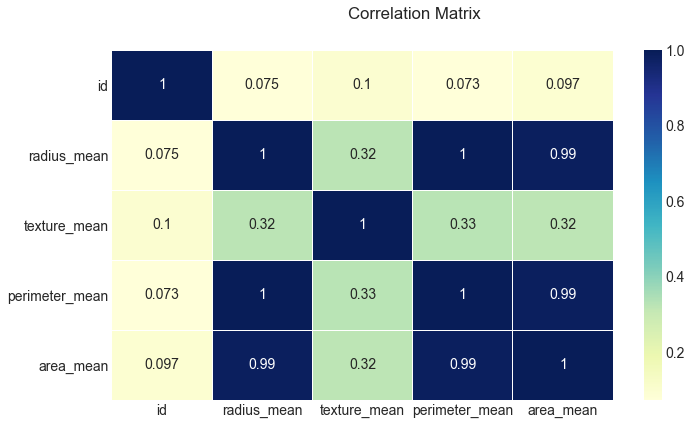

In [23]:
#create the correlation matrix heat map
plt.figure(figsize=(10,6))
sns.heatmap(data[[data.columns[0], data.columns[1],data.columns[2],data.columns[3],
                     data.columns[4], data.columns[5]]].corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);
plt.suptitle('Correlation Matrix')

# Data Preprocessing



Transform the 'M' and 'B' values (target variable) to 1 and 0 respectively. Following the encoding of the categorical features, we will continue with the normalization (scalling) of the numerical features. For this we will use the MinMax scalling method.

In [24]:
# Transform the 'yes' and 'no' values (target variable) to 1 and 0 respectively
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

#Scalling
scaler =MinMaxScaler(feature_range=(0, 1))
scaled_data =  pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

# Split the data to train and test sets
X = scaled_data.loc[:, scaled_data.columns != 'diagnosis']
y = scaled_data['diagnosis']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((455, 31), (455,), (114, 31), (114,))


# Model Evaluation Metrics

For model evaluation and To perform a full ROC analysis let's define two functions

In [26]:
#Defining model evaluation function
def getModelEvaluationMetrics(classifier, model_name: str, x_test: pd.core.frame.DataFrame,
                              y_test: pd.core.frame.DataFrame, y_predicted, plot_confusion_matrix=False,
                              figsize=(10, 8)) -> np.ndarray:

    conf_mat = confusion_matrix(y_true=y_test, y_pred=y_predicted)
    print('Confusion matrix:\n\n {0}'.format(conf_mat))

    if plot_confusion_matrix:
        labels = ['M', 'B']
        fig = plt.figure(figsize=figsize)
        ax = fig.add_subplot(111)
        cax = ax.matshow(conf_mat, cmap=plt.cm.Reds)
        fig.colorbar(cax)
        ax.set_xticklabels([''] + labels)
        ax.set_yticklabels([''] + labels)
        plt.style.use('fivethirtyeight')
        sns.set_style("white")
        plt.xlabel('Predicted')
        plt.ylabel('Expected')
        plt.title(f'Confusion Matrix for {model_name}', fontweight='bold')
        plt.show()

    # Calculating the precision (tp/tp+fp)
    precision = str(np.round((conf_mat[1][1] / (conf_mat[1][1] +
                              conf_mat[0][1])) * 100, 2))
    print('The precision is: {0} %'.format(precision))

    # Calculating the recall (tp/tp+fn)
    recall = str(np.round((conf_mat[1][1] / (conf_mat[1][1] +
                           conf_mat[1][0])) * 100, 2))
    print('The recall is: {0} %'.format(recall))

    return conf_mat

In [27]:
#Defining function for performing a full ROC analysis
def createROCAnalysis(classifier, model_name: str, y_test: pd.core.series.Series, pred_probs: np.ndarray,
                      plot_ROC_Curve=False, figsize=(10, 8)) -> int:
   
    if plot_ROC_Curve:
        plt.figure(figsize=figsize)
        plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill Classifier')
        fp_rate, tp_rate, _ = roc_curve(y_test, pred_probs[:, 1])
        plt.plot(fp_rate, tp_rate, marker='.', label=model_name)
        plt.style.use('fivethirtyeight')
        sns.set_style("white")
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve for {model_name}', fontweight='bold')
        plt.grid(True, alpha=0.1, color='black')
        plt.legend(loc='lower right')
        plt.show()

    # Calculate Area Under Curve (AUC) for the Receiver Operating
    # Characteristics Curve (ROC)
    auc_score = np.round(roc_auc_score(y_test, pred_probs[:, 1]), 4)
    print(f'{model_name} - ROC AUC score: {auc_score}')

    return auc_score

# Breast Cancer Prediction

In [28]:
# Instantiate the Random Forest model
#Pre-tuned Hyperparameter of Random Forest Classifier on this dataset

rf_class = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=20,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Confusion matrix:

 [[70  1]
 [ 3 40]]


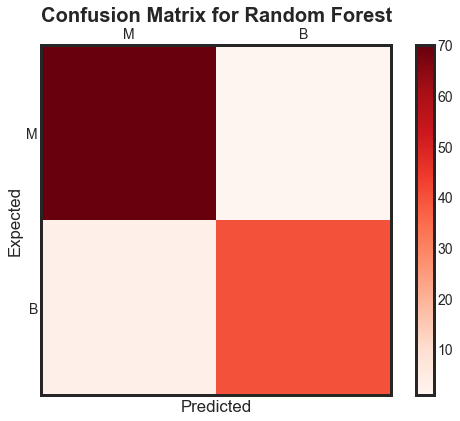

The precision is: 97.56 %
The recall is: 93.02 %


array([[70,  1],
       [ 3, 40]])

In [29]:
# Assign the above probabilities to the corresponding class ('no', 'yes')
rf_class.fit(X_train, y_train)
rf_y_pred = rf_class.predict(X_test)
# Evaluate the model by using Recall/Precission:
getModelEvaluationMetrics(classifier=rf_class, model_name='Random Forest',x_test=X_test, y_test=y_test,
                              y_predicted=rf_y_pred, plot_confusion_matrix=True, figsize=(8,6))

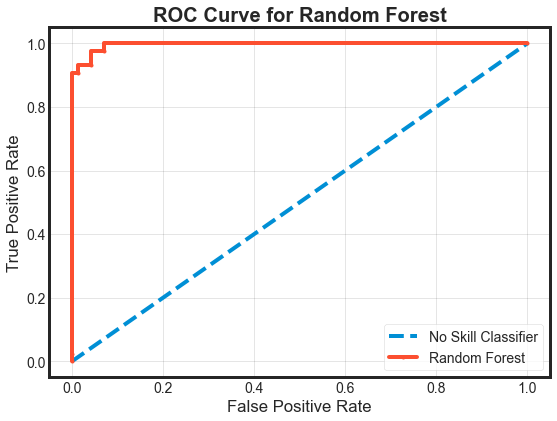

Random Forest - ROC AUC score: 0.9961


0.9961

In [30]:
# Evaluate the model by using ROC Curve:
rf_pred_probs = rf_class.predict_proba(X_test)
createROCAnalysis(classifier=rf_class, model_name='Random Forest', y_test=y_test, pred_probs=rf_pred_probs,
                  plot_ROC_Curve=True, figsize=(8,6))

# Feature decomposition using Principal Component Analysis( PCA)

The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance.

In [31]:
feature_importance = {}
best_estimator_fi = rf_class.feature_importances_

for feature, importance in zip(X_train.columns, best_estimator_fi):
    feature_importance[feature] = importance

importances = pd.DataFrame.from_dict(feature_importance, orient='index').rename(columns={0: 'Gini Score'})

importances = importances.sort_values(by='Gini Score', ascending=False)

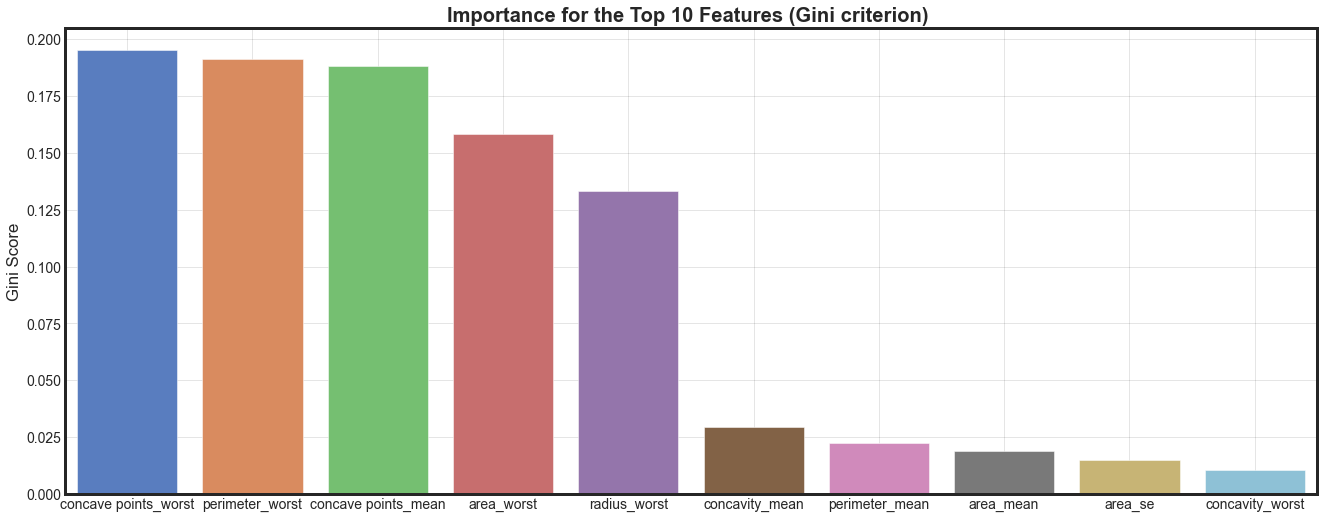

In [32]:
# Plot for feature importance
plt.figure(figsize=(20, 8))
plt.style.use('fivethirtyeight')
sns.set_style("white")
sns.barplot(x=importances.index[0:10],
            y=importances['Gini Score'].iloc[0:10], palette='muted')
plt.title(f'Importance for the Top 10 Features (Gini criterion) ',
          fontweight='bold')
plt.grid(True, alpha=0.1, color='black')
plt.show()

Let’s evaluate the same algorithms with a standardized copy of the dataset. Here, I use sklearn to scale and transform the data such that each attribute has a mean value of zero and a standard deviation of one.

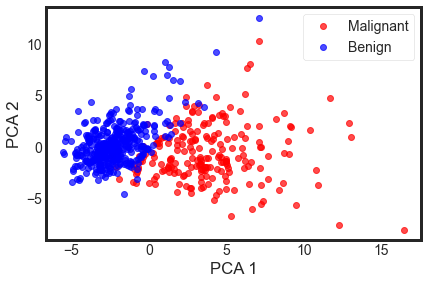

In [33]:
sc = StandardScaler()
X_s = sc.fit_transform(X)

pca = PCA(n_components = 10)
X_pca = pca.fit_transform(X_s)

PCA_df = pd.DataFrame()

PCA_df['PCA_1'] = X_pca[:,0]
PCA_df['PCA_2'] = X_pca[:,1]

plt.plot(PCA_df['PCA_1'][data.diagnosis == 1],PCA_df['PCA_2'][data.diagnosis == 1],'o', alpha = 0.7, color = 'r')
plt.plot(PCA_df['PCA_1'][data.diagnosis == 0],PCA_df['PCA_2'][data.diagnosis == 0],'o', alpha = 0.7, color = 'b')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(['Malignant','Benign'])
plt.show()

In [34]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

pca = PCA(n_components = 10)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

Confusion matrix:

 [[70  1]
 [ 2 41]]


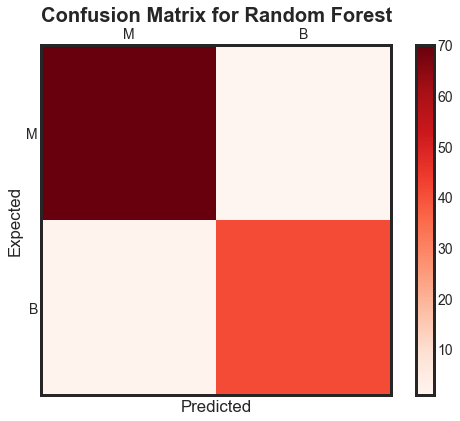

The precision is: 97.62 %
The recall is: 95.35 %


array([[70,  1],
       [ 2, 41]])

In [35]:
# Assign the above probabilities to the corresponding class ('no', 'yes')
rf_class.fit(X_train, y_train)
rf_y_pred = rf_class.predict(X_test)
# Evaluate the model by using Recall/Precission:
getModelEvaluationMetrics(classifier=rf_class, model_name='Random Forest',x_test=X_test, y_test=y_test,
                              y_predicted=rf_y_pred, plot_confusion_matrix=True, figsize=(8,6))

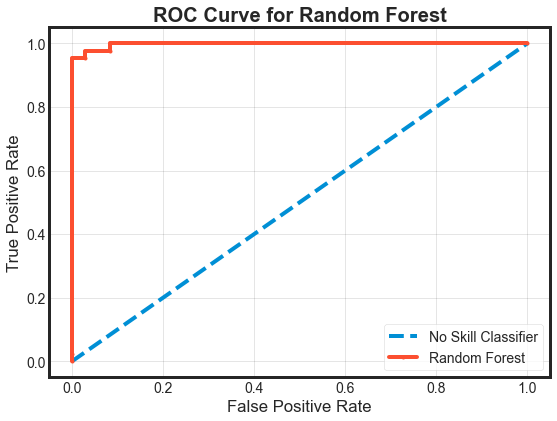

Random Forest - ROC AUC score: 0.9974


0.9974

In [36]:
# Evaluate the model by using ROC Curve:
rf_pred_probs = rf_class.predict_proba(X_test)
createROCAnalysis(classifier=rf_class, model_name='Random Forest', y_test=y_test, pred_probs=rf_pred_probs,
                  plot_ROC_Curve=True, figsize=(8,6))

# Conclusion

Using PCA I used only 10 components (important) from the dataset, though it contains 30 components!
However, with PCA+RF the model slightly outweigh in recall, precision and ROC AUC score than that of the previous model.

*** Random Forest Model Prediction without PCA**
1. The precision is: 95.24 %
1. The recall is: 93.02 %
1. ROC AUC score: 0.9954

*** Random Forest Model Prediction with PCA**

1. The precision is: 97.62 %
1. The recall is: 95.35 %
1. ROC AUC score: 0.9974

***If you find this notebook useful, would like to hear from you about it. Any feedbacks or any future tips for support will be highly appreciated.***

***For more exciting notebooks visit my Kaggle workspace!***  [ https://www.kaggle.com/pankajbhowmik ]